# Regresión Logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np

In [191]:
data = pd.read_csv("datasets/bank/bank.csv", sep=";")

In [192]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [193]:
data.shape

(4119, 21)

In [194]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [195]:
data["y"] = (data["y"]=="yes").astype(int)

In [196]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [197]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [198]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "Basic", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [199]:
data["education"].unique()

array(['Basic', 'University Degree', 'Professional Course', 'Unknown',
       'Illiterate'], dtype=object)

In [200]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [201]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [202]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,40.522770,255.882435,2.515799,969.916822,0.173792,0.134712,93.618248,-41.067147,3.662729,5169.459433,0.090613
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [203]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frecuencia de compra')

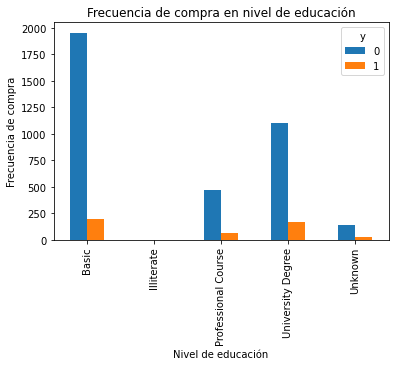

In [204]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra")

Text(0, 0.5, 'Proporción clientes')

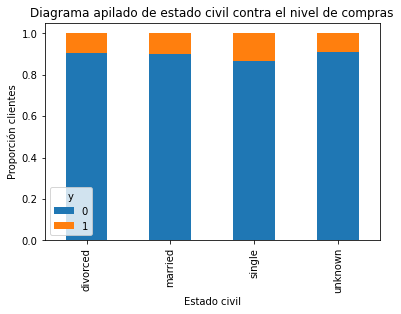

In [205]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

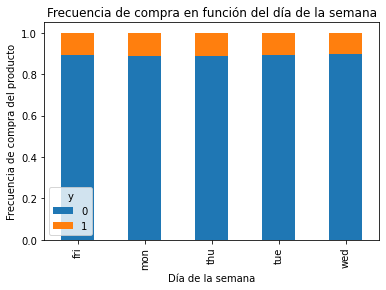

In [206]:
%matplotlib inline
table=pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

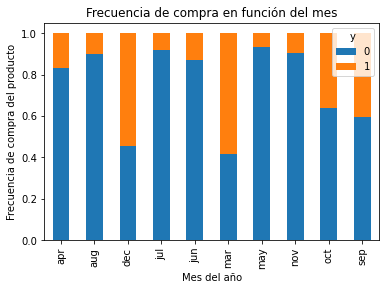

In [207]:
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

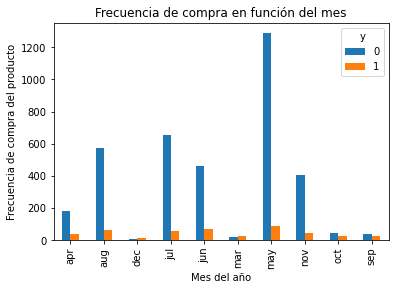

In [208]:
%matplotlib inline
table=pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=False)
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

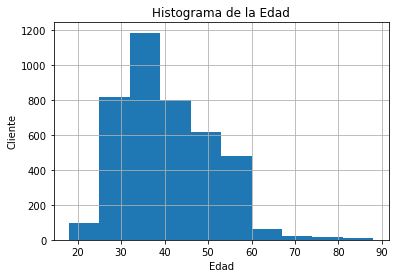

In [209]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

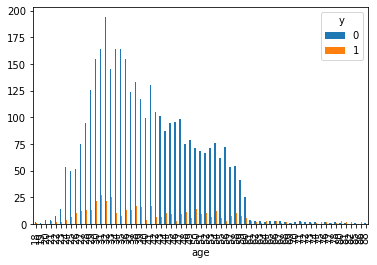

In [210]:
table=pd.crosstab(data.age, data.y).plot(kind="bar")

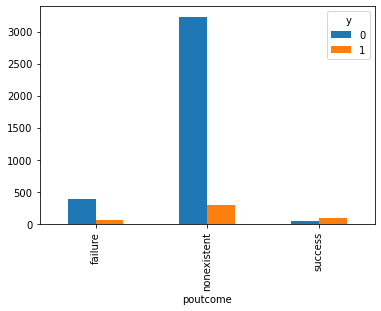

In [211]:
table=pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Conversión de las variables categóricas a dummies

In [212]:
categories = ["job","marital","education","housing","loan","contact","month","day_of_week","poutcome"]

for category in categories:
    cat_list = "cat"+"_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [213]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oc

In [214]:
data_vars = data.columns.values.tolist()

In [215]:
to_keep = (v for v in data_vars if v not in categories)
to_keep = (v for v in to_keep if v not in ["default"])

In [216]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_

In [217]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = (v for v in bank_data_vars if v not in Y)

## Selección derasgos para el modelo

In [218]:
n = 12

In [219]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [220]:
lr = LogisticRegression()

In [221]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [222]:
print(rfe.support_)

[False False False False False False False False  True False False  True
  True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True  True  True  True  True False False
 False False False False False False False False  True]


In [223]:
print(rfe.ranking_)

[40 39 14 42 43 10 24 18  1 30  7  1  1 38  1  4  1 22 35  6  5 44 13 28
 27 46 11 45 26 23  3  8 15 41 12 16 29  9  1 31 17  1  1  1  1  1 19 33
 20 32 37 25 36 34  2 21  1]


In [226]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 40),
 ('duration', False, 39),
 ('campaign', False, 14),
 ('pdays', False, 42),
 ('previous', False, 43),
 ('emp.var.rate', False, 10),
 ('cons.price.idx', False, 24),
 ('cons.conf.idx', False, 18),
 ('euribor3m', True, 1),
 ('nr.employed', False, 30),
 ('y', False, 7),
 ('job_admin.', True, 1),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 38),
 ('job_housemaid', True, 1),
 ('job_management', False, 4),
 ('job_retired', True, 1),
 ('job_self-employed', False, 22),
 ('job_services', False, 35),
 ('job_student', False, 6),
 ('job_technician', False, 5),
 ('job_unemployed', False, 44),
 ('job_unknown', False, 13),
 ('marital_divorced', False, 28),
 ('marital_married', False, 27),
 ('marital_single', False, 46),
 ('marital_unknown', False, 11),
 ('education_Basic', False, 45),
 ('education_Illiterate', False, 26),
 ('education_Professional Course', False, 23),
 ('education_University Degree', False, 3),
 ('education_Unknown', False, 8),
 ('housing_no', False,

In [231]:
cols = ["euribor3m", "job_blue-collar", "job_housemaid", "job_retired", "contact_cellular", 
"month_aug", "month_dec", "month_jul", "month_jun", "month_mar", "poutcome_nonexistent"]

In [232]:
X = bank_data[cols]
Y = bank_data["y"]

## Implementación del modelo en Python con stasmodel.api

In [233]:
import statsmodels.api as sm

In [236]:
logit_model = sm.Logit(Y, X)

In [237]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291375
         Iterations 7


In [238]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.157     
Dependent Variable:   y                 AIC:               2422.3455 
Date:                 2021-10-31 18:48  BIC:               2491.9025 
No. Observations:     4119              Log-Likelihood:    -1200.2   
Df Model:             10                LL-Null:           -1422.9   
Df Residuals:         4108              LLR p-value:       1.9067e-89
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.5946   0.0357 -16.6332 0.0000 -0.6647 -0.5245
job_blue-collar      -0.4773   0.1518  -3.1447 0.0017 -0.7747 -0.1798
job_housemaid         0.0526   0.3447   0.1525 0.8788 -0.6230  0.7282
job_retired           0.2723   0.2177   1.2510 0.2109 -0.1543  0.6989
contact_cellular     -0.2725   0.0893  -3.0525 0.0023 -0.4474 -0.0975
month_aug             0.6190   0.1740   3.5585 0.0004  0.2781  0.9600
month_dec             1.1571   0.4456   2.5969 0.0094  0.2838  2.0305
month_jul             1.0104   0.1846   5.4739 0.0000  0.6486  1.3722
month_jun             0.9453   0.1667   5.6717 0.0000  0.6187  1.2720
month_mar             1.6680   0.3125   5.3382 0.0000  1.0556  2.2804
poutcome_nonexistent -0.5782   0.1225  -4.7189 0.0000 -0.8184 -0.3381
=====================================================================

"""

## Implementación del modelo en Python con scikit-learn

In [239]:
from sklearn import linear_model

In [241]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [243]:
logit_model.score(X,Y)

0.8943918426802622

In [244]:
Y.mean()

0.10949259529011895

In [245]:
1-Y.mean()

0.8905074047098811

In [247]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,euribor3m,[-0.5119808106466348]
1,job_blue-collar,[-0.3918971424940834]
2,job_housemaid,[0.1114669958505221]
3,job_retired,[0.36849047695586323]
4,contact_cellular,[0.26221258049109275]
5,month_aug,[0.5216602669640332]
6,month_dec,[1.118148293163238]
7,month_jul,[0.8159377021871315]
8,month_jun,[1.06627261649212]
9,month_mar,[1.602906782568639]


## Validación del modelo logístico

In [251]:
from sklearn.model_selection import train_test_split

In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [260]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [264]:
from IPython.display import display, Math, Latex

In [270]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [265]:
probs = lm.predict_proba(X_test)

In [266]:
probs

array([[0.95875335, 0.04124665],
       [0.82397117, 0.17602883],
       [0.93684241, 0.06315759],
       ...,
       [0.64310349, 0.35689651],
       [0.97623285, 0.02376715],
       [0.4973355 , 0.5026645 ]])

In [267]:
prediction = lm.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [274]:
display(Math(r'\varepsilon\in (0.1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p>\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [275]:
prob = probs[:,1]

In [276]:
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df.head()

,0,prediction
0,0.041247,0
1,0.176029,1
2,0.063158,0
3,0.067278,0
4,0.031906,0


In [277]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,848
1,388


In [286]:
390/len(prob_df)*100

31.55339805825243

In [279]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,907
1,329


In [284]:
329/len(prob_df)*100

26.618122977346275

In [282]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,462
1,774


In [285]:
774/len(prob_df)*100

62.62135922330098

In [287]:
from sklearn import metrics

In [288]:
metrics.accuracy_score(Y_test, prediction)

0.9021035598705501

## Validación cruzada

In [289]:
from sklearn.model_selection import cross_val_score

In [308]:
scores = cross_val_score(linear_model.LogisticRegression(),X,Y,scoring="accuracy", cv=10)
scores

array([0.90048544, 0.88349515, 0.89563107, 0.8907767 , 0.90048544,
       0.8907767 , 0.88592233, 0.89320388, 0.89563107, 0.89051095])

In [309]:
scores.mean()

0.8926918715895402

In [307]:
len(X)

4119